In [17]:
import pandas as pd
from sklearn.metrics import confusion_matrix

import warnings

warnings.filterwarnings('ignore')


#### 2). Given the matrix, find model perfomance


d_c = [ [46, 7], [13, 34] ]


-  46: True Negatives

-  7: False Positives

-  13: False Negatives

-  34: True Positives


## 3). You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant. Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

###### Use the predictions dataset and pandas to help answer the following questions:

-  An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?


-  Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? 


-  Which model would be the best fit for this use case?

### Prepare Phase

In [23]:
duckies = pd.read_csv('c3.csv')
duckies

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect
...,...,...,...,...
195,No Defect,No Defect,Defect,Defect
196,Defect,Defect,No Defect,No Defect
197,No Defect,No Defect,No Defect,No Defect
198,No Defect,No Defect,Defect,Defect


In [24]:
# Prepare the data

duckies.describe()

,actual,model1,model2,model3
count,200,200,200,200
unique,2,2,2,2
top,No Defect,No Defect,No Defect,No Defect
freq,184,190,110,101


In [25]:
duckies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actual  200 non-null    object
 1   model1  200 non-null    object
 2   model2  200 non-null    object
 3   model3  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [26]:
duckies.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

In [27]:
duckies.model1.value_counts()

No Defect    190
Defect        10
Name: model1, dtype: int64

In [29]:
duckies.model2.value_counts()

No Defect    110
Defect        90
Name: model2, dtype: int64

In [34]:
duckies.model3.value_counts()

No Defect    101
Defect        99
Name: model3, dtype: int64

<AxesSubplot:>

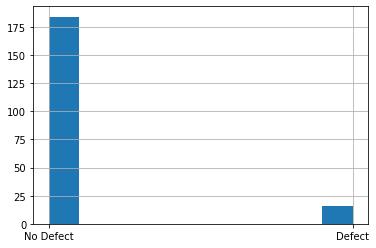

In [35]:
duckies.actual.hist()

<AxesSubplot:>

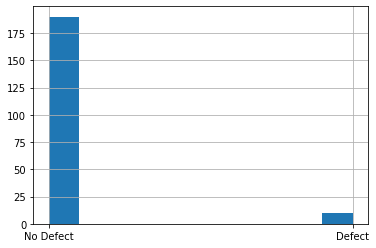

In [31]:
duckies.model1.hist()

<AxesSubplot:>

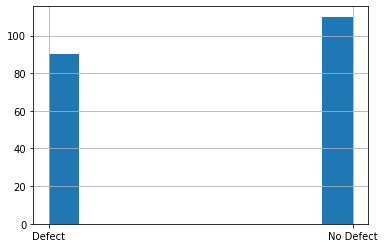

In [32]:
duckies.model2.hist()

<AxesSubplot:>

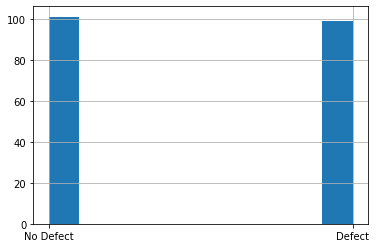

In [33]:
duckies.model3.hist()

# Key observations:

-  Actual and model 1 have least amount of defect. 
-  Model 2 and model3 have bigger portions of defect duckies. 
  


### Actual VS Model1 Confusion Matrix

In [41]:
confusion_matrix(duckies.actual, duckies.model1, labels =('No Defect', 'Defect'))


array([[182,   2],
       [  8,   8]])

In [42]:
pd.crosstab(duckies.actual, duckies.model1)

model1,Defect,No Defect
actual,,
Defect,8,8
No Defect,2,182


## Actual VS Model2 Confusion Matrix & Cross - tabulations

In [43]:

confusion_matrix(duckies.actual, duckies.model2, labels =('No Defect', 'Defect'))


array([[103,  81],
       [  7,   9]])

In [44]:
pd.crosstab(duckies.actual, duckies.model2)

model2,Defect,No Defect
actual,,
Defect,9,7
No Defect,81,103


### Actual VS Model3 Confusion Matrix

In [45]:
confusion_matrix(duckies.actual, duckies.model3, labels =('No Defect', 'Defect'))


array([[98, 86],
       [ 3, 13]])

In [47]:
pd.crosstab(duckies.actual, duckies.model3)

model3,Defect,No Defect
actual,,
Defect,13,3
No Defect,86,98


## Best Model Prediction: 

In [59]:
duckies.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

### Duckies Model I

In [57]:
# Model Accuracy

model_accuracy = (duckies.model1 == duckies.actual).mean()
print(f'\tModel accuracy: {model_accuracy:.2%}')

	Model accuracy: 95.00%


In [56]:
# Baseline Accuracy

baseline_accuracy = (duckies.baseline_prediction == duckies.actual).mean()
print(f'\tbaseline accuracy: {baseline_accuracy:.2%}')

	baseline accuracy: 92.00%


In [63]:
# Subset 

subset = duckies[duckies.actual == 'No Defect']
model_recall =(subset.model1 == subset.actual).mean()
baseline_recall = (subset.baseline_prediction == subset.actual).mean()

print(f'\tModel recall: {model_recall:.2%}')
print(f'\tBaseline recall: {baseline_recall:.2%}')


	Model accuracy: 95.00%
	baseline accuracy: 92.00%
--------------------------------------
	Model recall: 98.91%
	Baseline recall: 100.00%


In [70]:
# Precision

subset = duckies[duckies.model1 == 'No Defect']
model_precision = (subset.model1 == subset.actual).mean()

subset = duckies[duckies.baseline_prediction == 'No Defect']
baseline_precision = (subset.baseline_prediction == subset.actual).mean()


print(f'\tModel precision: {model_precision:.2%}')
print(f'\tBaseline precision: {baseline_precision:.2%}')


	Model precision: 95.79%
	Baseline precision: 92.00%


In [78]:
print('MODEL I: Accuracy | Recall | Precision')
print()
print(f'\tModel accuracy: {model_accuracy:.2%}')
print(f'\tbaseline accuracy: {baseline_accuracy:.2%}')

print('--------------------------------------')

print(f'\tModel recall: {model_recall:.2%}')
print(f'\tBaseline recall: {baseline_recall:.2%}')

print('--------------------------------------')
print(f'\tModel precision: {model_precision:.2%}')
print(f'\tBaseline precision: {baseline_precision:.2%}')

MODEL I: Accuracy | Recall | Precision

	Model accuracy: 95.00%
	baseline accuracy: 92.00%
--------------------------------------
	Model recall: 98.91%
	Baseline recall: 100.00%
--------------------------------------
	Model precision: 95.79%
	Baseline precision: 92.00%


### Duckies Model II

In [80]:
confusion_matrix(duckies.actual, duckies.model2, labels =('No Defect', 'Defect'))


array([[103,  81],
       [  7,   9]])

In [79]:
pd.crosstab(duckies.actual, duckies.model2)

model2,Defect,No Defect
actual,,
Defect,9,7
No Defect,81,103


In [83]:
model_accuracy2 = (duckies.model2 == duckies.actual).mean()
baseline_accuracy2 = (duckies.baseline_prediction == duckies.actual).mean()

subset2 = duckies[duckies.actual == 'No Defect']
model_recall2 =(subset.model2 == subset.actual).mean()
baseline_recall2 = (subset.baseline_prediction == subset.actual).mean()

subset2 = duckies[duckies.model2 == 'No Defect']
model_precision2 = (subset.model2 == subset.actual).mean()

subset2 = duckies[duckies.baseline_prediction == 'No Defect']
baseline_precision2 = (subset.baseline_prediction == subset.actual).mean()

In [89]:
print()
print('MODEL II: Accuracy | Recall | Precision')
print()
print(f'\tModel accuracy: {model_accuracy2:.2%}')
print(f'\tbaseline accuracy: {baseline_accuracy2:.2%}')

print('--------------------------------------')

print(f'\tModel recall: {model_recall2:.2%}')
print(f'\tBaseline recall: {baseline_recall2:.2%}')

print('--------------------------------------')
print(f'\tModel precision: {model_precision2:.2%}')
print(f'\tBaseline precision: {baseline_precision2:.2%}')


MODEL II: Accuracy | Recall | Precision

	Model accuracy: 56.00%
	baseline accuracy: 92.00%
--------------------------------------
	Model recall: 56.00%
	Baseline recall: 92.00%
--------------------------------------
	Model precision: 56.00%
	Baseline precision: 92.00%


### Duckies Model III



In [85]:
confusion_matrix(duckies.actual, duckies.model3, labels =('No Defect', 'Defect'))


array([[98, 86],
       [ 3, 13]])

In [86]:
pd.crosstab(duckies.actual, duckies.model3)

model3,Defect,No Defect
actual,,
Defect,13,3
No Defect,86,98


In [87]:
model_accuracy3 = (duckies.model3 == duckies.actual).mean()
baseline_accuracy3 = (duckies.baseline_prediction == duckies.actual).mean()

subset3 = duckies[duckies.actual == 'No Defect']
model_recall3 =(subset.model3 == subset.actual).mean()
baseline_recall3 = (subset.baseline_prediction == subset.actual).mean()

subset3 = duckies[duckies.model3 == 'No Defect']
model_precision3 = (subset.model3 == subset.actual).mean()

subset3 = duckies[duckies.baseline_prediction == 'No Defect']
baseline_precision3 = (subset.baseline_prediction == subset.actual).mean()

In [90]:
print()
print('MODEL III: Accuracy | Recall | Precision')
print()
print(f'\tModel accuracy: {model_accuracy3:.2%}')
print(f'\tbaseline accuracy: {baseline_accuracy3:.2%}')

print('--------------------------------------')

print(f'\tModel recall: {model_recall3:.2%}')
print(f'\tBaseline recall: {baseline_recall3:.2%}')

print('--------------------------------------')
print(f'\tModel precision: {model_precision3:.2%}')
print(f'\tBaseline precision: {baseline_precision3:.2%}')


MODEL III: Accuracy | Recall | Precision

	Model accuracy: 55.50%
	baseline accuracy: 92.00%
--------------------------------------
	Model recall: 55.50%
	Baseline recall: 92.00%
--------------------------------------
	Model precision: 55.50%
	Baseline precision: 92.00%


### An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. 
-  Which evaluation metric would be appropriate here? 

#### 


-  Which model would be the best fit for this use case?

### Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here?

In [91]:
# confusion_matrix(duckies.actual, duckies.model1, duckies.model2, duckies.model3, labels =('No Defect', 'Defect'))

# pd.crosstab(duckies.actual, duckies.predictions)

## 4).You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

### At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

-  Several models have already been developed with the data, and you can find their results here.

##### Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

#### a). In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?
#### b). Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?
#### c). Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?

## 5). Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.

-  sklearn.metrics.accuracy_score
-  sklearn.metrics.precision_score
-  sklearn.metrics.recall_score
-  sklearn.metrics.classification_report

